In [1]:
#importing all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the customer data
df_cust=pd.read_csv('customers.csv')
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
#importing the credit profile data
df_cs=pd.read_csv("credit_profiles.csv")
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [4]:
#importing the transactions data
df_trans=pd.read_csv("transactions.csv")
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,01-01-2023,63,Flipkart,Electronics,Phonepe
1,2,385,01-01-2023,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,01-01-2023,471,Shopify,Sports,Phonepe
3,4,797,01-01-2023,33,Shopify,Fashion & Apparel,Gpay
4,5,482,01-01-2023,68,Amazon,Fashion & Apparel,Net Banking


In [5]:
#checking the initial rows and columns of credit profile data
df_cs.shape

(1004, 6)

In [6]:
#checking the initial rows and columns of transaction data
df_trans.shape

(500000, 7)

In [7]:
#checking the initial rows and columns of customer data
df_cust.shape

(1000, 8)

In [8]:
#describing the customer data to find out the stats of the data 
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [9]:
#checking the null values in the customer data.
#encountered that annual income feature have 50 null values
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [10]:
#finding the null value data in customer column
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [11]:
#finding mean for the null values to replace the null value with median by occupation wise.
occupation_wise_median=df_cust.groupby('occupation')['annual_income'].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [12]:
#replacing the null values with median 
df_cust['annual_income'] = df_cust.apply(
        lambda row: occupation_wise_median[row['occupation']] if pd.isnull(row['annual_income']) 
        else row['annual_income'], axis=1
    )


In [13]:
#ensuring that now we don't have any null values
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

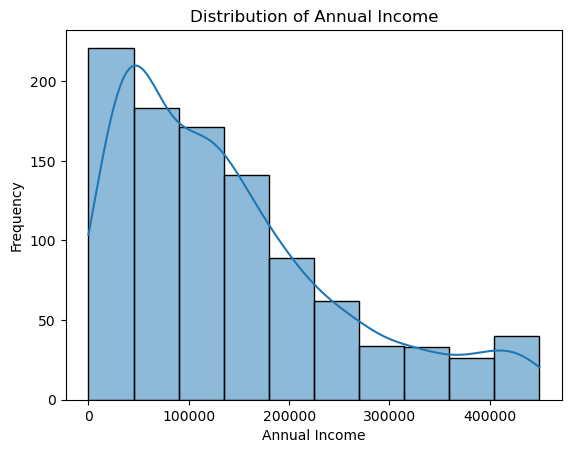

In [14]:
#visualizing the distribution of annual income
sns.histplot(df_cust['annual_income'], bins=10, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

In [15]:
#found that in some rows have annual income lesser than 100 which is not correct
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [16]:
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [17]:
#replacing with occupation wise median for the annual income which is lesser than 100
df_cust['annual_income'] = df_cust.apply(
    lambda row: occupation_wise_median[row['occupation']] if row['annual_income'] < 100 
    else row['annual_income'], axis=1)

In [18]:
#finding the mean of the avg annual income per occupation
avg_income_per_occupation=df_cust.groupby('occupation')['annual_income'].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [19]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [20]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

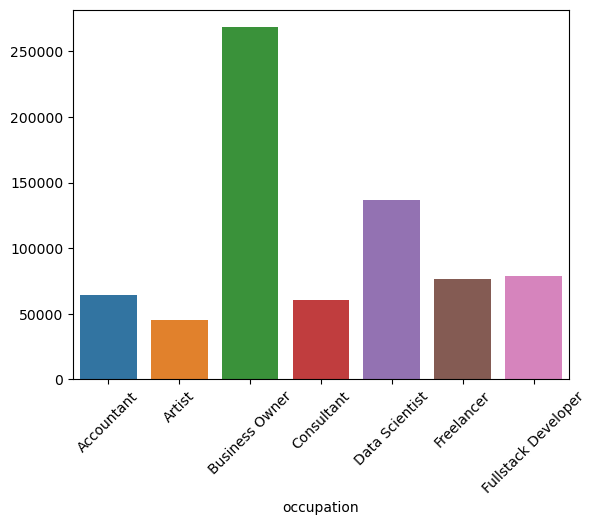

In [21]:
#visualizing the annual income with occupation
sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values,palette='tab10')
plt.xticks(rotation=45)
plt.show()

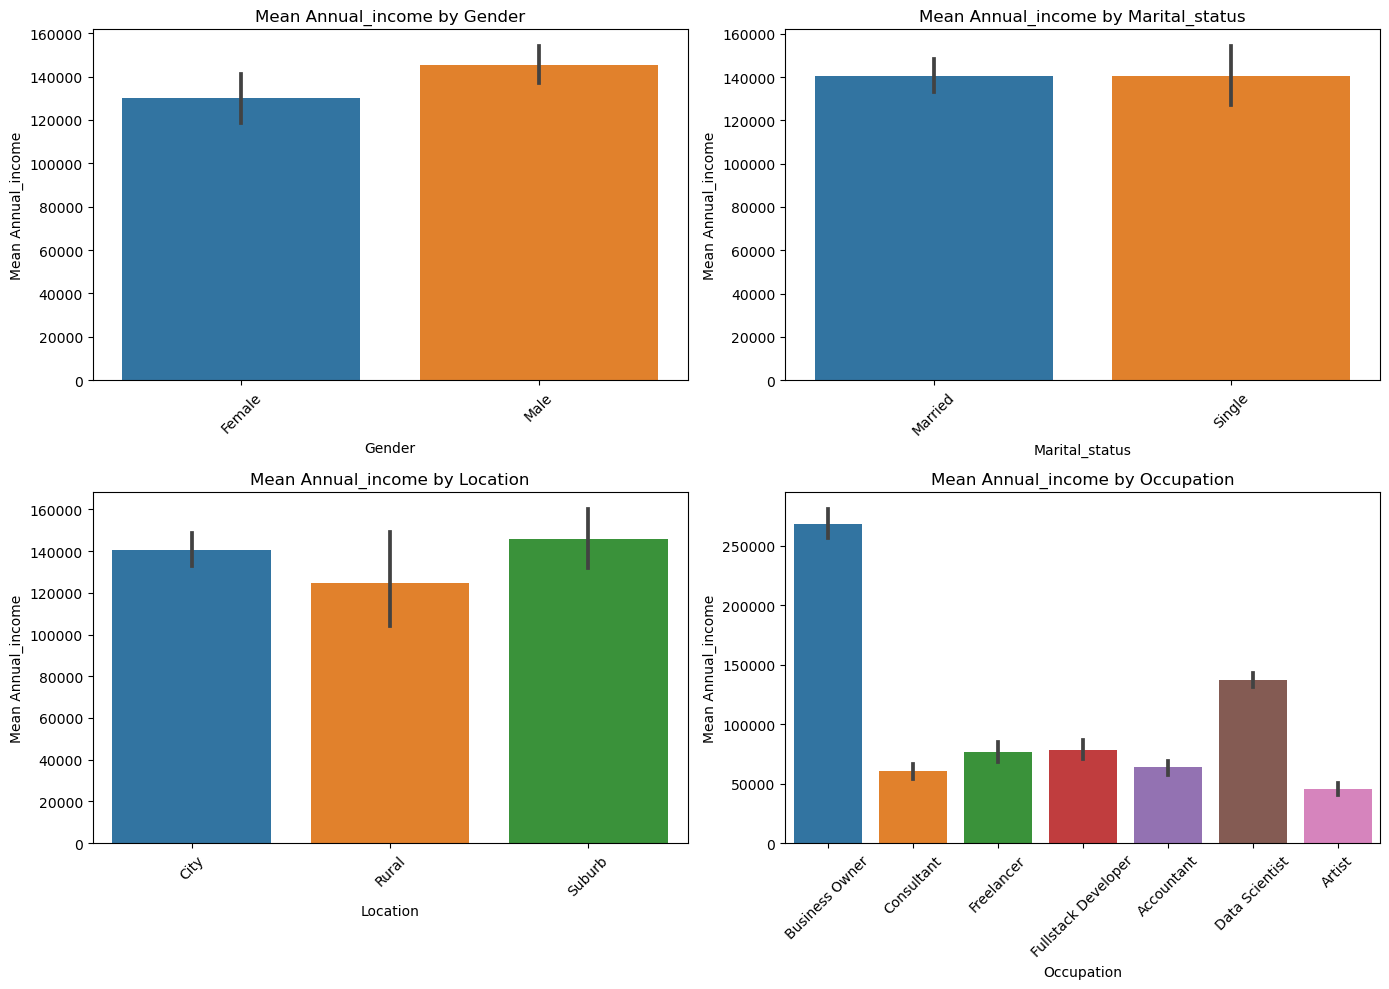

In [22]:
#visualizing with different metrics of the data
def plot_barplot(ax, data, categorical_column, target_column='annual_income'):
    sns.barplot(x=categorical_column, y=target_column, data=data, estimator=lambda x: sum(x) / len(x), ax=ax)
    ax.set_title(f'Mean {target_column.capitalize()} by {categorical_column.capitalize()}')
    ax.set_xlabel(categorical_column.capitalize())
    ax.set_ylabel(f'Mean {target_column.capitalize()}')
    ax.tick_params(axis='x', rotation=45)

# List of categorical columns
categorical_columns = ['gender', 'marital_status', 'location', 'occupation']

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot bar plots for each categorical column
for i, column in enumerate(categorical_columns):
    plot_barplot(axes[i//2, i%2], df_cust, column)

plt.tight_layout()
plt.show()

In [23]:
#checking the null value in age feature
df_cust.age.isnull().sum()

0

In [24]:
#finding the stat value of the age feature and found that there is a outlier in age.
#age shouldn't be neither 1 nor 135
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [25]:
#getting age data which age is less more than 15 and less than 80
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [26]:
#getting median age by the occupation 
age_wise_median=df_cust.groupby('occupation')['age'].median()
age_wise_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [27]:
#replacing the min and max age with median value 
df_cust['age'] = df_cust.apply(
    lambda row: age_wise_median[row['occupation']] if (row['age'] < 15 or row['age'] > 80) 
    else row['age'], axis=1
)

In [28]:
#validating our replacements
df_cust.iloc[[728]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
728,729,Rehan Yadav,Male,51.0,City,Business Owner,382836.0,Married


In [29]:
#now we don't have any outliers in age group
df_cust.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [30]:
bins = [17, 25, 48, 65]  # Including a bin for ages less than 18 and more than 65
labels = ['18-25', '26-48','49-65']

# Create the age_group column using pd.cut
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bins, labels=labels, right=True)

df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [31]:
#checking the number of customers according to the age group
age_group_counts=df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

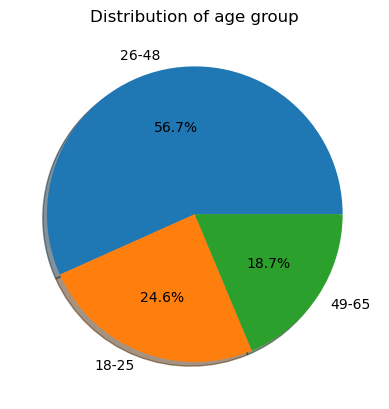

In [32]:
#visualizing the distribution of age group
plt.pie(age_group_counts,labels=age_group_counts.index,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of age group')
plt.show

In [33]:
#checking the number of customer by location wise and found that in city we have more credit card using customer 
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [34]:
#checking the number of customer by gender wise  
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [35]:
#grouping the data according to the customer location and gender wise
customer_location_gender=df_cust.groupby(['location','gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


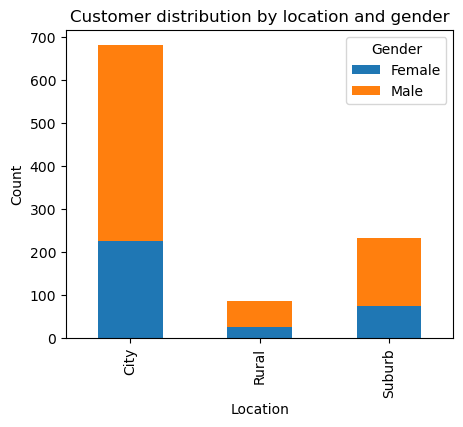

In [36]:
#visualizing the Customer distribution by location and gender
customer_location_gender.plot(kind='bar',stacked=True,figsize=(5,4))
plt.title('Customer distribution by location and gender')
plt.legend(title='Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [37]:
#checking the credit score data
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [38]:
#checking the rows and columns of credit score data and found the extra 4 columns in the data
df_cs.shape

(1004, 6)

In [39]:
df_cs['cust_id'].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [40]:
#checking the duplicate rows in the data
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [41]:
#removing the duplicate data
df_cs_clean=df_cs.drop_duplicates(subset='cust_id',keep="last")
df_cs_clean.shape

(1000, 6)

In [42]:
#checking the null values and found that credit limit have 65 null values
df_cs_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [43]:
df_cs_clean[df_cs_clean.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [44]:
#checking the number of customers with the corresponding credit limit 
df_cs_clean.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

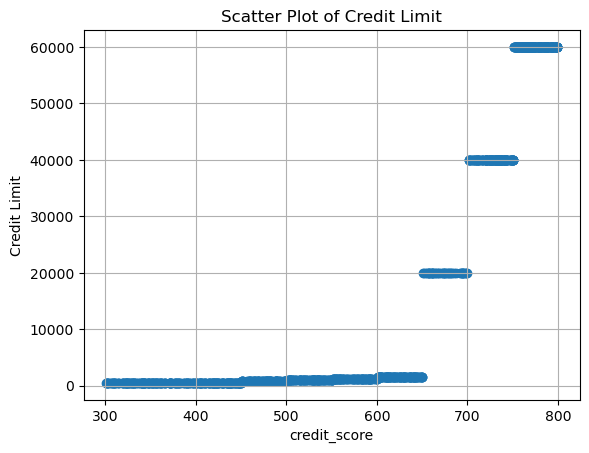

<Figure size 1200x600 with 0 Axes>

In [45]:
#visualizing the credit score according to the credit limit
plt.scatter(df_cs_clean['credit_score'], df_cs_clean['credit_limit'])
plt.xlabel('credit_score')
plt.ylabel('Credit Limit')
plt.title('Scatter Plot of Credit Limit')
plt.grid(True)
plt.figure(figsize=(12, 6))
plt.show()

In [46]:
#categorizing the credit limit by creating the credit score range 
bin_ranges = [300,450,500,550,600,650,700,750,800]   
bin_labels = ['300-449', '450-499','500-549','550-599','600-649','650-699','700-749','750-799']

# Create the credit limit range column using pd.cut
df_cs_clean['credit_score_range'] = pd.cut(df_cs_clean['credit_score'], bins=bin_ranges, labels=bin_labels,include_lowest=True, right=True)

df_cs_clean.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17772\2400096370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean['credit_score_range'] = pd.cut(df_cs_clean['credit_score'], bins=bin_ranges, labels=bin_labels,include_lowest=True, right=True)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [47]:
#finding mode to replace the null values in credi limit
mode_df=df_cs_clean.groupby('credit_score_range')['credit_limit'].agg(lambda x:x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [48]:
#checking the sample rows with null values
df_cs_clean[df_cs_clean.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
658,656,785,0.387122,14866.0,1.0,NaN,750-799
114,115,619,0.128910,151.0,1.0,NaN,600-649
276,277,781,0.459545,24618.0,1.0,NaN,750-799


In [49]:
#meriging the two tables for replacing the null values
df_cs_clean_1=pd.merge(df_cs_clean,mode_df, on='credit_score_range',suffixes=('','_mode'))
df_cs_clean_1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,985,770,0.628088,33405.0,2.0,60000.0,750-799,60000.0
996,990,772,0.259958,11937.0,2.0,60000.0,750-799,60000.0
997,993,782,0.477170,20305.0,2.0,60000.0,750-799,60000.0
998,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0


In [50]:
#checking the sample rows with null values
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
399,307,304,0.254547,74.0,4.0,NaN,300-449,500.0
801,46,761,0.596041,24234.0,2.0,NaN,750-799,60000.0
729,415,646,0.503281,533.0,3.0,NaN,600-649,1500.0


In [51]:
#replacing the null values with mode data
df_cs_clean_2=df_cs_clean_1.copy()
df_cs_clean_2['credit_limit'].fillna(df_cs_clean_2['credit_limit_mode'],inplace=True)
df_cs_clean_2.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0


In [52]:
#checking the null value in new data
df_cs_clean_2[df_cs_clean_2.credit_limit.isnull()].shape

(0, 8)

In [53]:
##checking the null value in new data
df_cs_clean_2.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [54]:
#describing the new clean data to get stats.
df_cs_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


<Axes: >

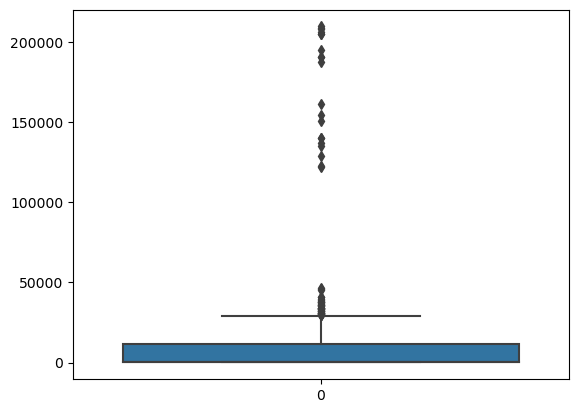

In [55]:
#visualizing the outliers
sns.boxplot(df_cs_clean_2.outstanding_debt)

In [56]:
#getting the data which has outstanding debt more than the credit limit
df_cs_clean_2[df_cs_clean_2.outstanding_debt>df_cs_clean_2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
13,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
38,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
44,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
105,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0
148,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
369,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
412,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0
482,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0
614,647,498,0.658087,128818.0,3.0,750.0,450-499,750.0


In [57]:
#For the rows where the condition is True (i.e., outstanding_debt is greater than credit_limit)
#the value in the outstanding_debt column is set to the corresponding value in the credit_limit column.
df_cs_clean_2.loc[df_cs_clean_2.outstanding_debt>df_cs_clean_2.credit_limit,'outstanding_debt']=df_cs_clean_2['credit_limit']

In [58]:
df_cs_clean_2.iloc[[6,13,38]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0
13,94,737,0.739948,40000.0,2.0,40000.0,700-749,40000.0
38,272,703,0.446886,40000.0,1.0,40000.0,700-749,40000.0


In [59]:
df_cs_clean_2.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0


In [60]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [61]:
#merging the customer data and new transaction data to get insights 
df_merged=df_cust.merge(df_cs_clean_2,on='cust_id',how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [62]:
#finding the correlation relations between the metrics of customer data and transaction data
numerical_column=['credit_score','credit_utilisation','outstanding_debt','credit_limit','annual_income','age']
correlation_matrix=df_merged[numerical_column].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847951,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080504,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847951,-0.080504,0.810581,1.000000,0.684780,0.510980
annual_income,0.575751,-0.086368,0.555661,0.684780,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510980,0.619037,1.000000


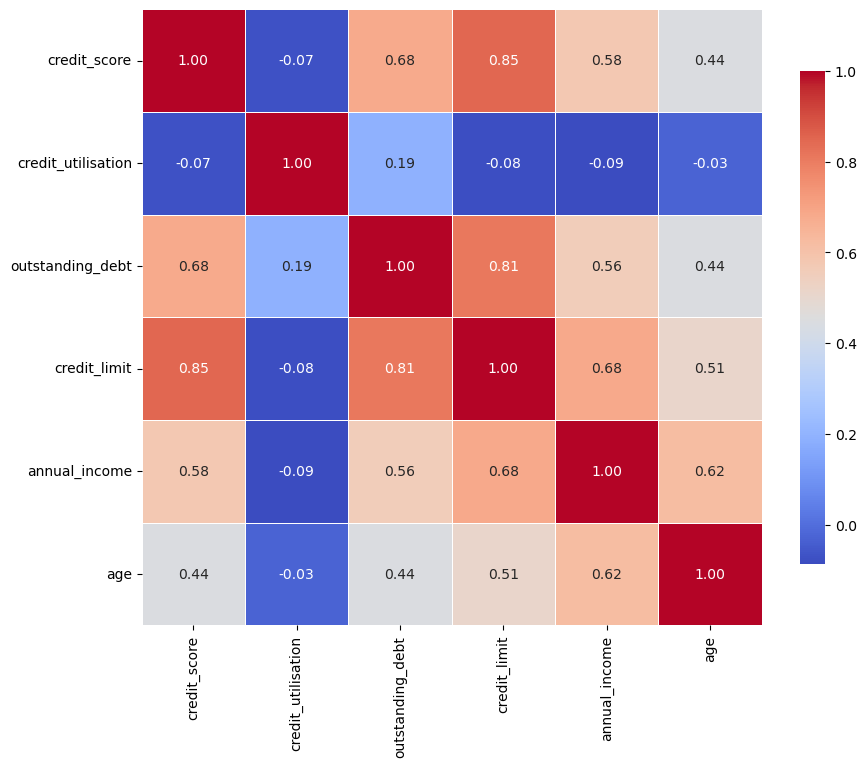

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,             # Annotate cells with the correlation values
    fmt=".2f",              # Format the annotation to 2 decimal places
    cmap="coolwarm",        # Use a diverging color palette
    linewidths=0.5,         # Width of the lines that will divide each cell
    linecolor="white",      # Color of the lines
    cbar_kws={"shrink": 0.8}, # Shrink the color bar to 80% of its original size
    annot_kws={"size": 10}, # Font size of the annotations
)
plt.show()

In [64]:
#getting the transaction data
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,01-01-2023,63,Flipkart,Electronics,Phonepe
1,2,385,01-01-2023,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,01-01-2023,471,Shopify,Sports,Phonepe
3,4,797,01-01-2023,33,Shopify,Fashion & Apparel,Gpay
4,5,482,01-01-2023,68,Amazon,Fashion & Apparel,Net Banking


In [65]:
#finding the rows and columns for the transaction data 
df_trans.shape

(500000, 7)

In [66]:
#checking the null values
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [67]:
# Replace null values with the most frequent value (mode)
most_frequent = df_trans['platform'].mode()[0]
df_trans['platform'].fillna(most_frequent, inplace=True)

In [68]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [69]:
#describing to get the stats for the transaction data and found that min transaction is 0 which is not correct.
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [70]:
#getting the data where transaction amount is 0
df_trans_zero=df_trans[df_trans.tran_amount==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,01-01-2023,0,Amazon,Electronics,Credit Card
141,142,839,01-01-2023,0,Amazon,Electronics,Credit Card
517,518,147,01-01-2023,0,Amazon,Electronics,Credit Card
533,534,891,01-01-2023,0,Amazon,Electronics,Credit Card
586,587,108,01-01-2023,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,05-09-2023,0,Amazon,Electronics,Credit Card
499494,499495,295,05-09-2023,0,Amazon,Electronics,Credit Card
499708,499709,141,05-09-2023,0,Amazon,Electronics,Credit Card
499928,499929,4,05-09-2023,0,Amazon,Electronics,Credit Card


In [71]:
#checking the rows and columns of the data where transaction amount is 0
df_trans_zero.shape

(4734, 7)

In [72]:
#checking the transaction amount with zero according to the platform feature
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [73]:
#checking the transaction amount with zero according to the product category
df_trans_zero.product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [74]:
#checking the transaction amount with zero according to the payment category
df_trans_zero.payment_type.value_counts()

payment_type
Credit Card    4734
Name: count, dtype: int64

In [75]:
#checking the transaction amount with zero according to the three categories
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [76]:
#getting the data only with these three categories to find out the median
df_trans_1=df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=='Electronics')&(df_trans.payment_type=='Credit Card')]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,01-01-2023,635,Amazon,Electronics,Credit Card
120,121,440,01-01-2023,0,Amazon,Electronics,Credit Card
141,142,839,01-01-2023,0,Amazon,Electronics,Credit Card
173,174,676,01-01-2023,60439,Amazon,Electronics,Credit Card
190,191,763,01-01-2023,697,Amazon,Electronics,Credit Card


In [77]:
#getting the median value 
median_tran_amount=df_trans_1[(df_trans_1.tran_amount>0)].tran_amount.median()
median_tran_amount

554.0

In [78]:
#replaced with the median value wherever the transaction amount is 0 
df_trans['tran_amount'].replace(0,median_tran_amount,inplace=True)

In [79]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

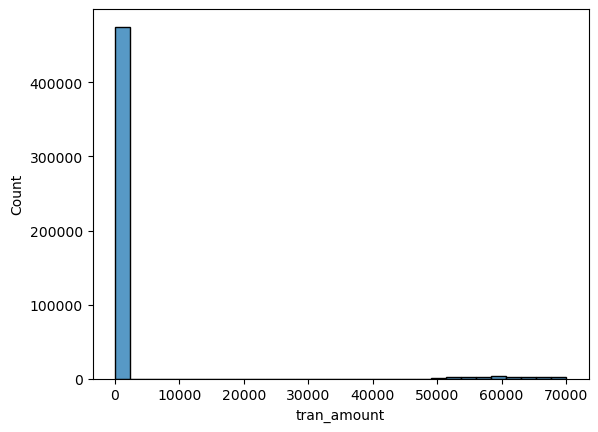

In [80]:
#visualizing the transaction amount 
sns.histplot(df_trans.tran_amount,bins=30)

In [81]:
#finding the iqr value to treat the outliers
q1,q3=df_trans['tran_amount'].quantile([0.25,0.75])
iqr=q3-q1
lower=q1-2*iqr
upper=q3+2*iqr
lower,upper

(-628.0, 1107.0)

In [82]:
#since we don't have any negative value then we are taking data which is more than upper 1107.0.
#to find out the rows with outlier
df_trans_outlier=df_trans[df_trans.tran_amount>upper]
df_trans_outlier

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,01-01-2023,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,01-01-2023,57869,Amazon,Toys & Games,Gpay
94,95,770,01-01-2023,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,01-01-2023,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,01-01-2023,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,05-09-2023,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,05-09-2023,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,05-09-2023,60184,Flipkart,Sports,Debit Card
499966,499967,662,05-09-2023,54678,Meesho,Sports,Gpay


In [83]:
#checking the outlier rows and columns
df_trans_outlier.shape

(25000, 7)

In [84]:
#to get the correct data filtering the data below than upper value
df_trans_norm=df_trans[df_trans.tran_amount<upper]
df_trans_norm

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,01-01-2023,63,Flipkart,Electronics,Phonepe
1,2,385,01-01-2023,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,01-01-2023,471,Shopify,Sports,Phonepe
3,4,797,01-01-2023,33,Shopify,Fashion & Apparel,Gpay
4,5,482,01-01-2023,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,05-09-2023,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,05-09-2023,43,Amazon,Books,Phonepe
499997,499998,57,05-09-2023,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,05-09-2023,538,Flipkart,Home Decor,Gpay


In [85]:
#getting the mean value to treat the outliers
df_trans_mean=df_trans_norm.groupby('product_category')['tran_amount'].mean()
df_trans_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [86]:
df_trans_outlier.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,01-01-2023,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,01-01-2023,57869,Amazon,Toys & Games,Gpay
94,95,770,01-01-2023,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,01-01-2023,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,01-01-2023,51669,Shopify,Kitchen Appliances,Credit Card


In [87]:
#replacing the outliers with mean data
df_trans.loc[df_trans_outlier.index,'tran_amount']=df_trans_outlier['product_category'].map(df_trans_mean)

In [88]:
df_trans.loc[df_trans_outlier.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,01-01-2023,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,01-01-2023,50.333298,Amazon,Toys & Games,Gpay
94,95,770,01-01-2023,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,01-01-2023,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,01-01-2023,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,05-09-2023,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,05-09-2023,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,05-09-2023,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,05-09-2023,269.181631,Meesho,Sports,Gpay


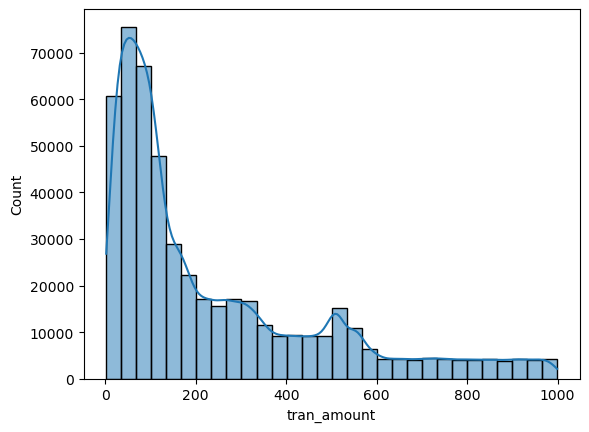

In [89]:
#visualizing the transaction data by transaction amount.
sns.histplot(df_trans.tran_amount,bins=30,kde=True)
plt.show()

In [90]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,01-01-2023,63.0,Flipkart,Electronics,Phonepe
1,2,385,01-01-2023,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,01-01-2023,471.0,Shopify,Sports,Phonepe
3,4,797,01-01-2023,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,01-01-2023,68.0,Amazon,Fashion & Apparel,Net Banking


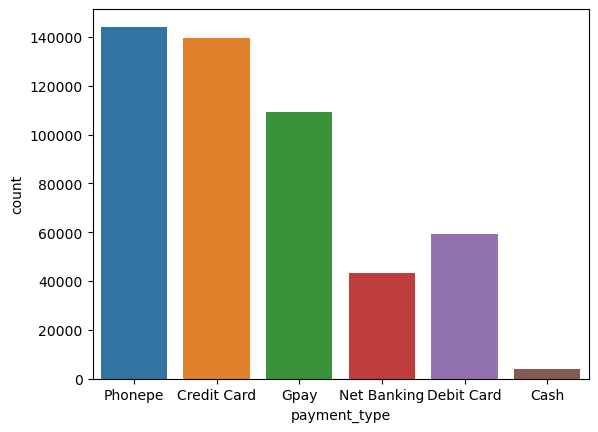

In [91]:
sns.countplot(x=df_trans.payment_type)
plt.show()

In [92]:
#merging all the clean dataframes to get the insights
df_merged_1=df_merged.merge(df_trans,on='cust_id',how='inner')
df_merged_1.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,01-01-2023,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,01-01-2023,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,01-01-2023,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,01-01-2023,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,01-01-2023,37.0,Flipkart,Fashion & Apparel,Credit Card


In [93]:
df_merged_1.shape

(500000, 22)

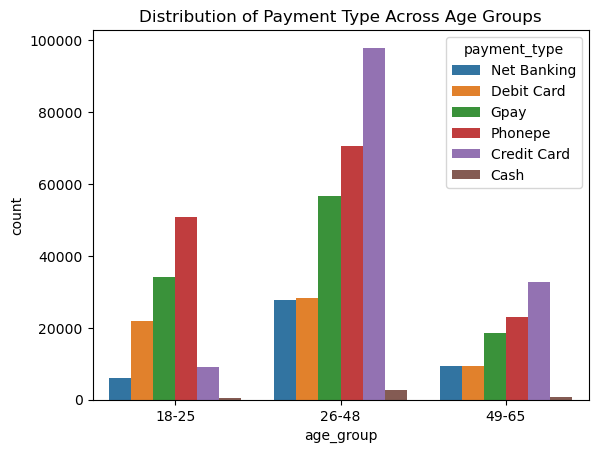

In [94]:
# Create the count plot
sns.countplot(x='age_group', hue='payment_type', data=df_merged_1)

# Add a title
plt.title('Distribution of Payment Type Across Age Groups')

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

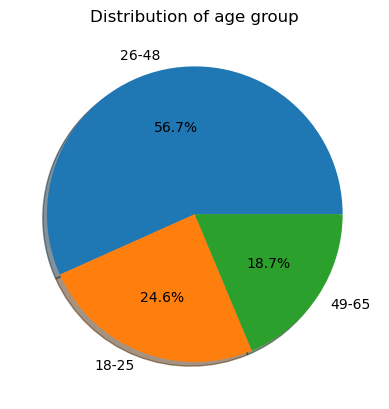

In [100]:
#visualizing the distribution of age group
plt.pie(age_group_counts,labels=age_group_counts.index,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of age group')
plt.show

In [98]:
# Calculate total annual income per age group
age_group_totals = df_merged_1.groupby('age_group')['annual_income'].sum()

# Calculate overall total annual income
overall_total_income = age_group_totals.sum()

# Calculate percentage of total annual income per age group
age_group_percentages = (age_group_totals / overall_total_income) * 100

print(age_group_percentages)

age_group
18-25     6.467328
26-48    58.884140
49-65    34.648532
Name: annual_income, dtype: float64


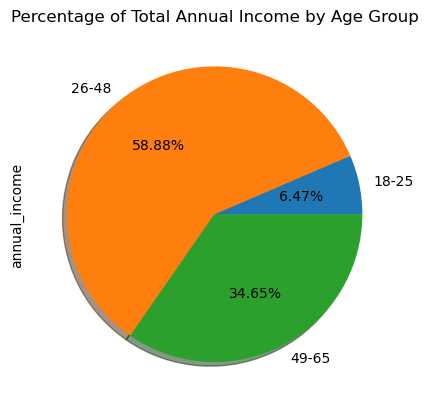

In [104]:
age_group_percentages.plot(kind='pie', autopct='%.2f%%', shadow=True)
plt.title('Percentage of Total Annual Income by Age Group')
plt.show()

In [109]:
# Calculate average credit score per age group
average_credit_score = df_merged_1.groupby('age_group')['credit_score'].mean()

print("Average Credit Score by Age Group:\n", average_credit_score)

Average Credit Score by Age Group:
 age_group
18-25    484.708344
26-48    597.918043
49-65    701.876810
Name: credit_score, dtype: float64


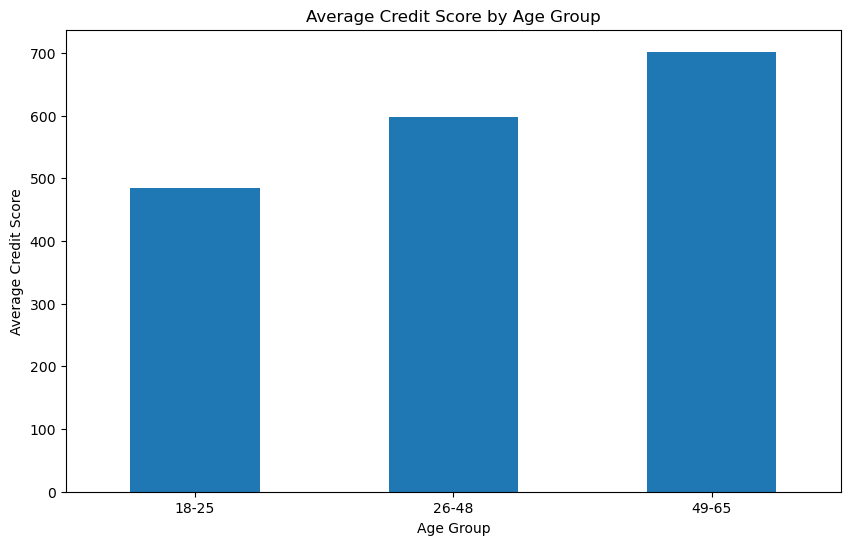

In [110]:
# Bar chart for average credit score
plt.figure(figsize=(10, 6))
average_credit_score.plot(kind='bar')
plt.title('Average Credit Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Credit Score')
plt.xticks(rotation=0)
plt.show()

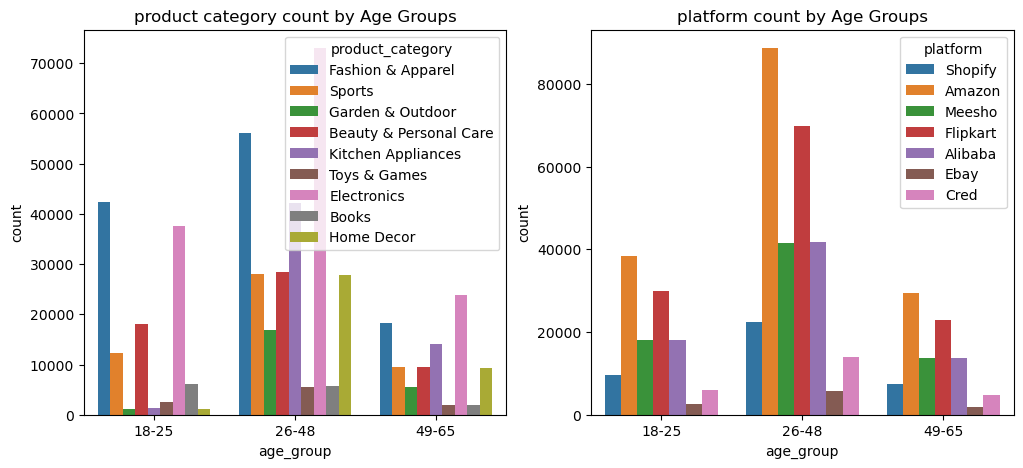

In [96]:
fix, (ax1,ax2)=plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='age_group', hue='product_category', data=df_merged_1,ax=ax1)
ax1.set_title('product category count by Age Groups')

sns.countplot(x='age_group', hue='platform', data=df_merged_1,ax=ax2)
ax2.set_title('platform count by Age Groups')
plt.show()

Insights specific to customers with age group of 18 - 25
  


1. People with age group of 18 -25 accounts to 24.6% of customer base in the data.
2. Avg annual income of this age group is less than 10%.
3. They don't have much credit history which is getting reflected in their credit score and max credit limit.
4. Usage of credit cards as payment type is relatively low compared to other groups. 
5. Avg transaction amount made with credit cards is also low compared to other groups. 
6. Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care.
    
